# Working with Tabular Data

Tabular Data lesson from MOIISI workshop


In [1]:
import os
import numpy

In [2]:
distance_file = os.path.join('data','distance_data_headers.csv')
print(distance_file)

data\distance_data_headers.csv


In [3]:
# use the mumpy function genfromtxt to read in the data 
help(numpy.genfromtxt)

Help on function genfromtxt in module numpy:

genfromtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, skip_header=0, skip_footer=0, converters=None, missing_values=None, filling_values=None, usecols=None, names=None, excludelist=None, deletechars=" !#$%&'()*+,-./:;<=>?@[\\]^{|}~", replace_space='_', autostrip=False, case_sensitive=True, defaultfmt='f%i', unpack=None, usemask=False, loose=True, invalid_raise=True, max_rows=None, encoding='bytes')
    Load data from a text file, with missing values handled as specified.
    
    Each line past the first `skip_header` lines is split at the `delimiter`
    character, and characters following the `comments` character are discarded.
    
    Parameters
    ----------
    fname : file, str, pathlib.Path, list of str, generator
        File, filename, list, or generator to read.  If the filename
        extension is `.gz` or `.bz2`, the file is first decompressed. Note
        that generators must return byte strings. The string

In [4]:
distances = numpy.genfromtxt(fname=distance_file, delimiter = ',', dtype ='unicode')

In [5]:
print(distances)

[['Frame' 'THR4_ATP' 'THR4_ASP' 'TYR6_ATP' 'TYR6_ASP']
 ['1' '8.9542' '5.8024' '11.5478' '9.9557']
 ['2' '8.6181' '6.0942' '13.9594' '11.6945']
 ...
 ['9998' '8.6625' '7.7306' '9.5469' '10.3063']
 ['9999' '9.2456' '7.8886' '9.8151' '10.7564']
 ['10000' '8.8135' '7.917' '9.9517' '10.7848']]


In [6]:
# nan is not a number

In [7]:
headers = distances [0]
print(headers)

['Frame' 'THR4_ATP' 'THR4_ASP' 'TYR6_ATP' 'TYR6_ASP']


In [8]:
# Take a slice of teh data that is just the numerical values. Call this slice data. 
data = distances[1:]
print(data)

[['1' '8.9542' '5.8024' '11.5478' '9.9557']
 ['2' '8.6181' '6.0942' '13.9594' '11.6945']
 ['3' '9.0066' '6.0637' '13.0924' '11.3043']
 ...
 ['9998' '8.6625' '7.7306' '9.5469' '10.3063']
 ['9999' '9.2456' '7.8886' '9.8151' '10.7564']
 ['10000' '8.8135' '7.917' '9.9517' '10.7848']]


In [9]:
data = data.astype(numpy.float)

In [10]:
print(data)

[[1.00000e+00 8.95420e+00 5.80240e+00 1.15478e+01 9.95570e+00]
 [2.00000e+00 8.61810e+00 6.09420e+00 1.39594e+01 1.16945e+01]
 [3.00000e+00 9.00660e+00 6.06370e+00 1.30924e+01 1.13043e+01]
 ...
 [9.99800e+03 8.66250e+00 7.73060e+00 9.54690e+00 1.03063e+01]
 [9.99900e+03 9.24560e+00 7.88860e+00 9.81510e+00 1.07564e+01]
 [1.00000e+04 8.81350e+00 7.91700e+00 9.95170e+00 1.07848e+01]]


In [11]:
#array_name[row,column]
print(data[2,1])

9.0066


In [12]:
# What will be the output fo this code?
element1 = data[0,1]
element2 = data[1,0]
print(element1, element2)

8.9542 2.0


In [13]:
print(F'The values of element2 is {element2}.')

The values of element2 is 2.0.


In [14]:
#new_array = array_name[start:end, start:end]
small_data = data[:10,:3]
print(small_data)

[[ 1.      8.9542  5.8024]
 [ 2.      8.6181  6.0942]
 [ 3.      9.0066  6.0637]
 [ 4.      9.2002  6.0227]
 [ 5.      9.1294  5.9365]
 [ 6.      9.0462  6.2553]
 [ 7.      8.8657  5.9186]
 [ 8.      9.3256  6.2351]
 [ 9.      9.4184  6.1993]
 [10.      9.06    6.0478]]


In [15]:
#Think about what these slices are. Write a print statement to check yourself
array1= small_data[5, :]
array2= small_data[:,1:]
print(F' The array1 is {array1}')

 The array1 is [6.     9.0462 6.2553]


In [16]:
print(data)

[[1.00000e+00 8.95420e+00 5.80240e+00 1.15478e+01 9.95570e+00]
 [2.00000e+00 8.61810e+00 6.09420e+00 1.39594e+01 1.16945e+01]
 [3.00000e+00 9.00660e+00 6.06370e+00 1.30924e+01 1.13043e+01]
 ...
 [9.99800e+03 8.66250e+00 7.73060e+00 9.54690e+00 1.03063e+01]
 [9.99900e+03 9.24560e+00 7.88860e+00 9.81510e+00 1.07564e+01]
 [1.00000e+04 8.81350e+00 7.91700e+00 9.95170e+00 1.07848e+01]]


In [17]:
thr4_atp = data[:,1]
average = numpy.mean(thr4_atp)
print(average)

10.876950930000001


In [18]:
# range for loop: range(start, end)

In [19]:
# Using commands you already know, calculate the number of colums
num_columns = len(data[0, :])
print(num_columns)

5


In [20]:
for num in range(1, num_columns):
    column = data[:, num]
    avg_col = numpy.mean(column)
    print(F' {headers[num]}: {avg_col: .3f}')

 THR4_ATP:  10.877
 THR4_ASP:  7.342
 TYR6_ATP:  11.210
 TYR6_ASP:  10.993


## Plotting

Creating plots using matplotlib.

In [21]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


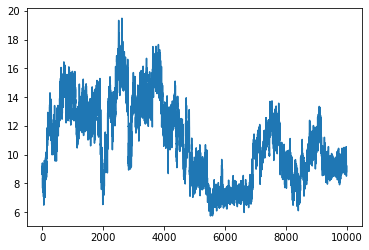

In [22]:
plt.figure()
plt.plot(data[:, 1])

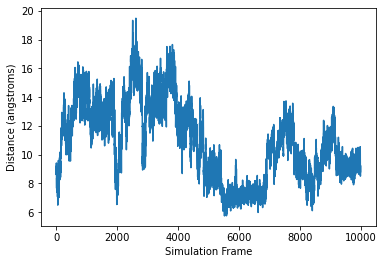

In [23]:
plt.figure()
plt.xlabel("Simulation Frame")
plt.ylabel("Distance (angstroms)")
plt.plot(data[:, 1])

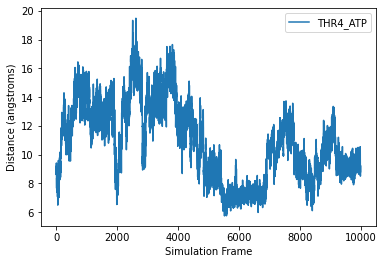

In [28]:
# Pull out the name of the first column of data. Save it with the variable name sample
sample = headers[1]

plt.figure()
plt.xlabel("Simulation Frame")
plt.ylabel("Distance (angstroms)")
plt.plot(data[:, 1], label=sample)
plt.legend()

# Save the figure 
plt.savefig(F'{sample}.png')

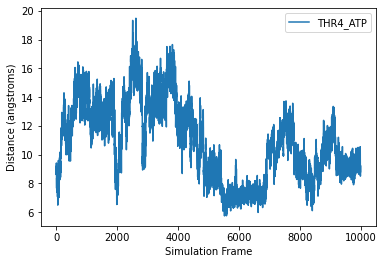

In [30]:
sample = headers[1]

plt.figure()
plt.xlabel("Simulation Frame")
plt.ylabel("Distance (angstroms)")
plt.plot(data[:, 1], label=sample)
plt.legend()

# Save the figure - high quality 
plt.savefig(F'{sample}_high_quality.png', dpi=300)

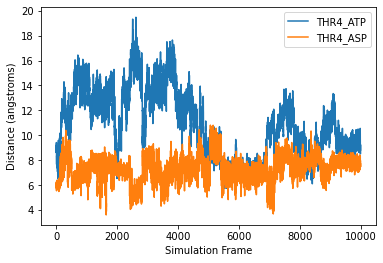

In [31]:
# Plot two sets of data on the same graph 
sample = headers[1]
sample2 = headers[2]

plt.figure()
plt.xlabel("Simulation Frame")
plt.ylabel("Distance (angstroms)")
plt.plot(data[:, 1], label=sample)
plt.plot(data[:, 2], label=sample2)
plt.legend()

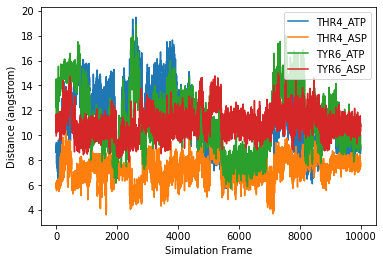

In [35]:
plt.figure()

for col in range(1, num_columns):
    sample = headers[col]
    
    plt.plot(data[:, col], label=sample)
    
plt.xlabel("Simulation Frame")
plt.ylabel("Distance (angstrom)")
plt.legend()

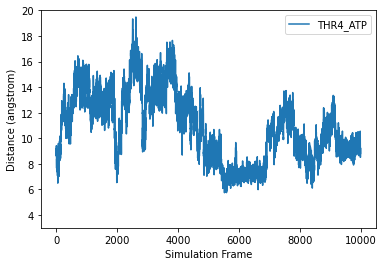

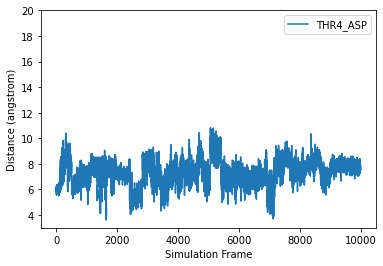

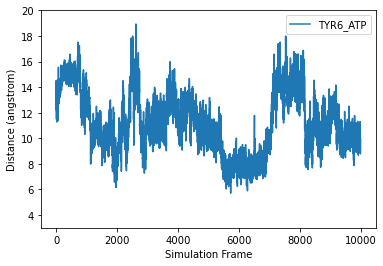

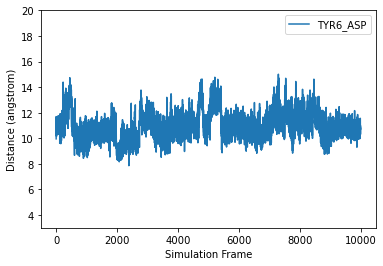

In [42]:


for col in range(1, num_columns):
    plt.figure()
    sample = headers[col]
    
    plt.plot(data[:, col], label=sample)
    
    plt.xlabel("Simulation Frame")
    plt.ylabel("Distance (angstrom)")
    
   # Make all y axes on range from 4 to 20 
    plt.ylim(3,20)
    plt.legend()
    plt.savefig(f"{sample}.png")

In [43]:
headers[0]

'Frame'

In [44]:
small_data

array([[ 1.    ,  8.9542,  5.8024],
       [ 2.    ,  8.6181,  6.0942],
       [ 3.    ,  9.0066,  6.0637],
       [ 4.    ,  9.2002,  6.0227],
       [ 5.    ,  9.1294,  5.9365],
       [ 6.    ,  9.0462,  6.2553],
       [ 7.    ,  8.8657,  5.9186],
       [ 8.    ,  9.3256,  6.2351],
       [ 9.    ,  9.4184,  6.1993],
       [10.    ,  9.06  ,  6.0478]])

In [45]:
small_data[::2]

array([[1.    , 8.9542, 5.8024],
       [3.    , 9.0066, 6.0637],
       [5.    , 9.1294, 5.9365],
       [7.    , 8.8657, 5.9186],
       [9.    , 9.4184, 6.1993]])

In [46]:
# New slicing syntax - get every other row. 
# array[start:stop:interval]
data[:10:2]

array([[ 1.    ,  8.9542,  5.8024, 11.5478,  9.9557],
       [ 2.    ,  8.6181,  6.0942, 13.9594, 11.6945],
       [ 3.    ,  9.0066,  6.0637, 13.0924, 11.3043],
       [ 4.    ,  9.2002,  6.0227, 14.5282, 10.1763],
       [ 5.    ,  9.1294,  5.9365, 13.5321, 10.6279],
       [ 6.    ,  9.0462,  6.2553, 13.906 , 10.4292],
       [ 7.    ,  8.8657,  5.9186, 12.9312, 10.2176],
       [ 8.    ,  9.3256,  6.2351, 13.0721, 10.474 ],
       [ 9.    ,  9.4184,  6.1993, 13.2614, 10.366 ],
       [10.    ,  9.06  ,  6.0478, 13.4953, 11.0118]])

In [55]:
# Get every 100th value
x_data = data[0::100, 0]
y_data = data[0::100, 1]

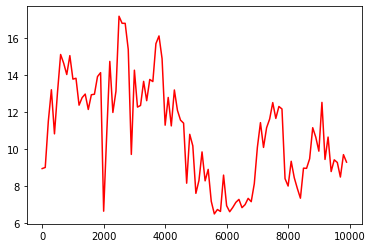

In [65]:
# Plotting with x and y values 
# o, *, -o, --o, 
plt.figure()
plt.plot(x_data, y_data, color="red")